# **Galah Data Pipeline** - Scaled

In [1]:
from analysis import XDPipeline
from astropy.table import Table

In [2]:
# Set true to rerun XD analysis - approx 10 hours for 100 iterations with 3 repeats per gaussian component
rerun_XD = False

## **Importing/ Filtering Galah Data**
- First data is imported according to the cuts outlined in `0_data_distribution`

In [3]:
galah_data_filtered_path = 'data/filtered/Galah/Galah_data_filtered_1061.fits'

In [4]:
# Open from file into astropy Table
galah_processed_data = Table.read(galah_data_filtered_path, format='fits')

## **XD Pipeline**

### **Initialisation of Pipeline**
- Imports revelent total data set and the keys for the data features (and corrosponding errors of intrest)

In [5]:
galah_data_keys = ['fe_h', 'alpha_fe', 'Na_fe', 'Al_fe', 'Mn_fe', 'Y_fe', 'Ba_fe', 'Eu_fe', 'Mg_Cu', 'Mg_Mn', 'Ba_Eu', 'Energy']
galah_data_error_keys = ['e_fe_h', 'e_alpha_fe', 'e_Na_fe', 'e_Al_fe', 'e_Mn_fe', 'e_Y_fe', 'e_Ba_fe', 'e_Eu_fe', 'e_Mg_Cu', 'e_Mg_Mn', 'e_Ba_Eu', 'e_Energy']

galah_pipeline = XDPipeline(galah_processed_data, galah_data_keys, galah_data_error_keys)

### **XD Run Overview**  

#### **Parameters**  

| **Parameter**                     | **Value**  |
|------------------------------------|------------|
| **Max EM Iterations**              | \(10^9\)   |
| **Number of Gaussian Components**  | 0 – 10     |
| **Repeats per Gaussian Component** | 3          |
| **Initializations per Repeat**     | 100        |

#### **Stored Data**  
- Achieved Weights, Means, and Covariances for each run  
- Model Evaluation Metrics:  
  - AIC (Akaike Information Criterion)
  - BIC (Bayesian Information Criterion)

In [6]:
if rerun_XD:
    galah_pipeline.run_XD(gauss_component_range=(1,10), max_iterations=int(1e9), n_repeats=3, n_init=100, save_path='XD_Results/Galah/gallah_XD_2_3_23.pkl')

### **Run Results Analysis** 

#### **Overall**

| **Overall Results Analysis**                        | **Details** |
|---------------------------------|------------|
| **Performance Metric**          | BIC Score |
| **Filters Applied**             | None |
| **Saves**                       | Gaussian Weights, Means, and Covariances |
| **Records**                     | Corresponding BIC score |

#### **Filtered**

| **Filtered Results Analysis**   | **Details** |
|---------------------------------|------------|
| **Performance Metric**          | BIC Score |
| **Filters Applied**             | 5 Gaussian Components |
| **Saves**                       | Gaussian Weights, Means, and Covariances |
| **Records**                     | Corresponding BIC score |


 Best Overall BIC Score: 28116.4021 occurred at:
   - Gaussian Components (n_gauss): 3
   - Repeat cycle (n): 2
   - Initialisation (i): 52
 The following filters were applied: {'n_gauss': 5, 'repeat': None}
 Best BIC Score from filtered inputs: 28863.1862 occurred at:
   - Gaussian Components (n_gauss): 5
   - Repeat cycle (n): 0
   - Initialisation (i): 39
Table of Number of Gaussians vs Number of Failed XD Runs
+----+-----------------+----------------------+------------------+
|    |   No. Gaussians |   No. Failed XD runs |   Total No. Runs |
|----+-----------------+----------------------+------------------|
|  0 |               1 |                    0 |              300 |
|  1 |               2 |                    0 |              300 |
|  2 |               3 |                    0 |              300 |
|  3 |               4 |                    0 |              300 |
|  4 |               5 |                    0 |              300 |
|  5 |               6 |                    0 

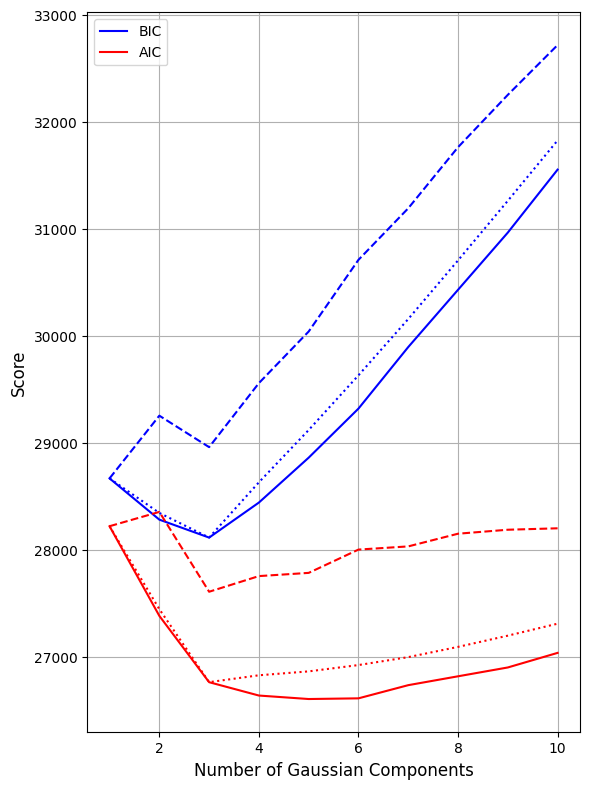

In [7]:
galah_pipeline.compare_XD(opt_metric = 'BIC', n_gauss_filter = 5, repeat_no_filter = None, save_path='XD_Results/Galah/gallah_XD_2_3_23.pkl')

### **Determine Responsibilities and Assignment**

- Use the gaussian components from the best XD run of filter subset (best filtered)

In [8]:
galah_pipeline.assigment_XD(assignment_metric = 'best filtered')

Assigning stars to Gaussian components based on the best filtered XD model.
This has been optimised for the BIC score and returned the results:
 Best BIC Score: 28863.1862 occurred at:
   - Gaussian Components (n_gauss): 5
   - Repeat cycle (n): 0
   - Initialisation (i): 39


### **Print Summary of Gaussian Components and Assigment**


In [9]:
labels = {
    3: "GS/E",
    1: "Splash",
    0: "Aurora",
    4: "Eos",
    2: "Background",

}
galah_gauss_summary = galah_pipeline.table_results_XD(labels)


Summary of GMM Fit Result for GALAH-Gaia Sample
+----+-------------+--------------+---------+-------------+--------------+-------------+--------------+--------------+--------------+-------------+-------------+-------------+-------------+-------------+--------------+---------------------------------+
|    | Component   |   Weight (%) |   Count |   Count (%) | fe_h         | alpha_fe    | Na_fe        | Al_fe        | Mn_fe        | Y_fe        | Ba_fe       | Eu_fe       | Mg_Cu       | Mg_Mn       | Ba_Eu        | Scaled Energy ($\times 10^5$)   |
+====+=============+==============+=========+=============+==============+=============+==============+==============+==============+=============+=============+=============+=============+=============+==============+=================================+
|  0 | GS/E        |         35.4 |     389 |        36.7 | -0.95 ± 0.16 | 0.11 ± 0.05 | -0.26 ± 0.07 | -0.16 ± 0.08 | -0.36 ± 0.08 | 0.08 ± 0.06 | 0.38 ± 0.15 | 0.47 ± 0.07 | 0.61 ± 0.05 | 0.

### **Plot Results**  
- Generates a 2D plot of **Extreme Deconvolution (XD)** results.  
- Stars are colored by their assigned Gaussian component.  
- Gaussian components are shown as confidence ellipses.  
- Includes marginal histograms and a bar chart of component weights.  
- Confidence interval adjustable via `z_score` (default: 2 ~ 95%). 

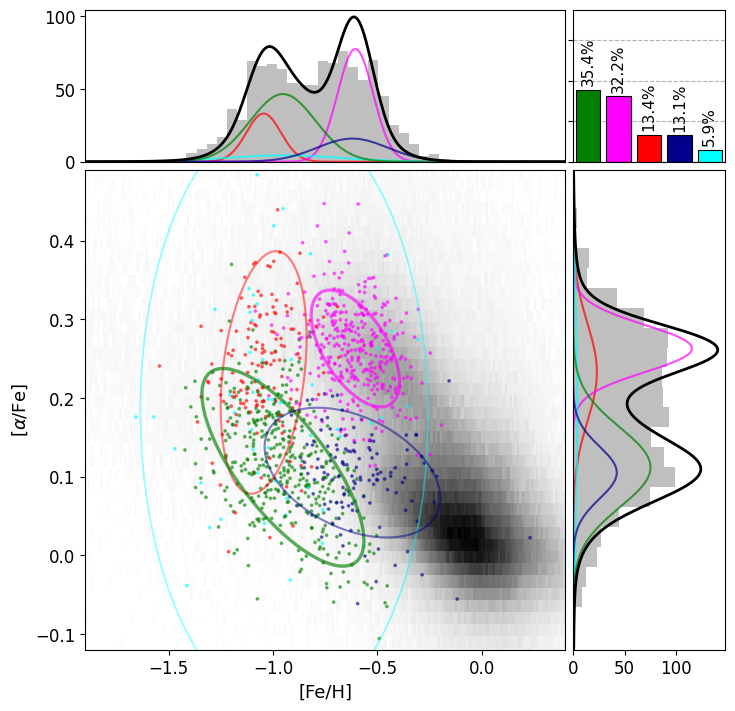

In [10]:
galah_pipeline.plot_XD( x_key = 'fe_h', y_key='alpha_fe', 
    z_score = 2,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["red", "magenta", "cyan", "green", "darkblue"], 
    xlim = (-1.9, 0.4), ylim=(-0.12, 0.49),
)

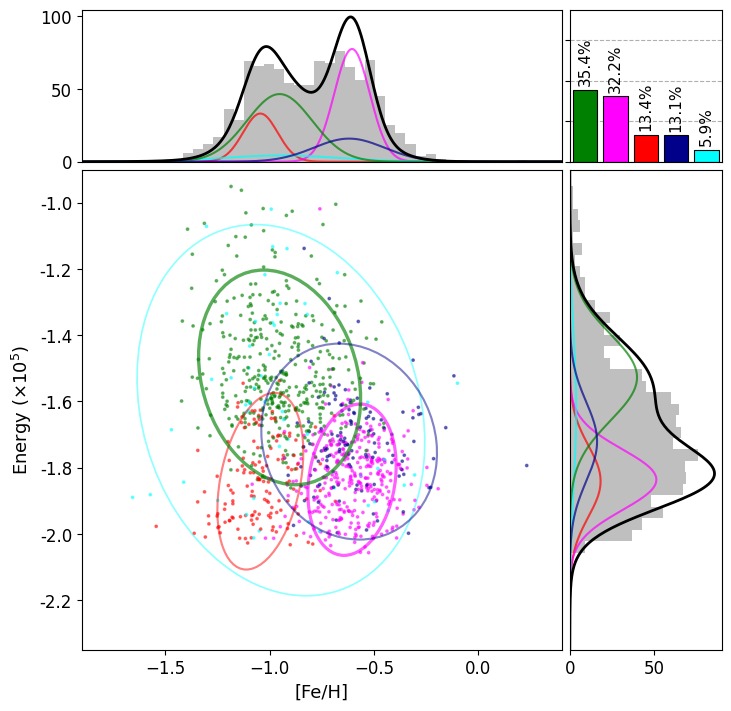

In [12]:
galah_pipeline.plot_XD( x_key = 'fe_h', y_key='Energy',
    z_score = 2,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["red", "magenta", "cyan", "green", "darkblue"], 
    xlim = (-1.9, 0.4), ylim=(-2.35e5, -0.9e5),
)

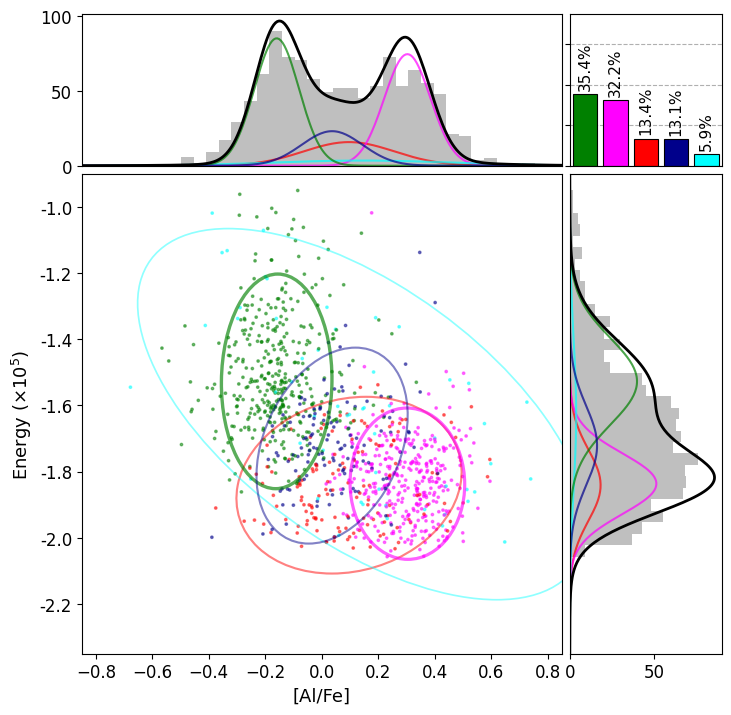

In [ ]:
galah_pipeline.plot_XD( x_key = 'Al_fe', y_key='Energy',
    z_score = 2,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["red", "magenta", "cyan", "green", "darkblue"], 
    xlim = (-0.85, 0.85), ylim=(-2.35e5, -0.9e5),
)

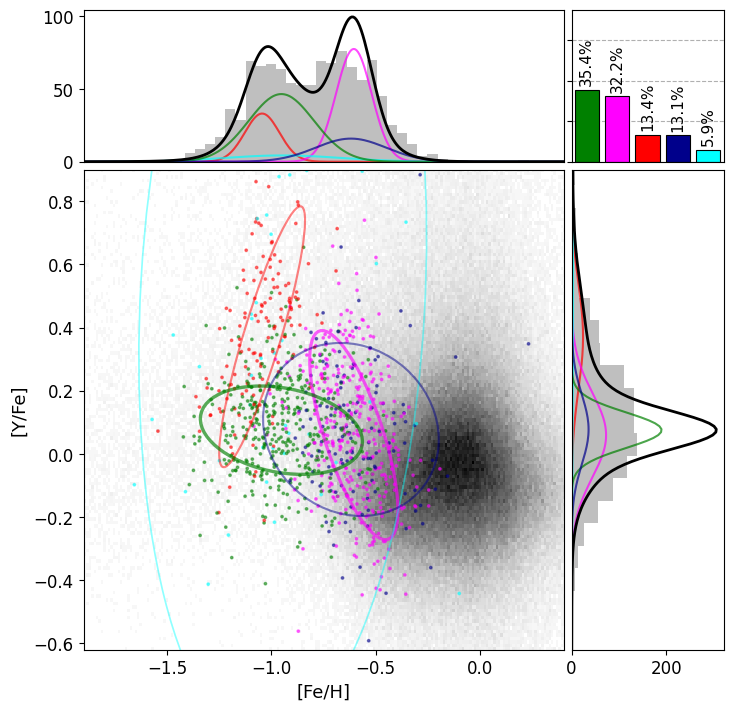

In [ ]:
galah_pipeline.plot_XD( x_key = 'fe_h', y_key='Y_fe',
    z_score = 2,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["red", "magenta", "cyan", "green", "darkblue"], 
    xlim = (-1.9, 0.4), ylim=(-0.62, 0.9),
)

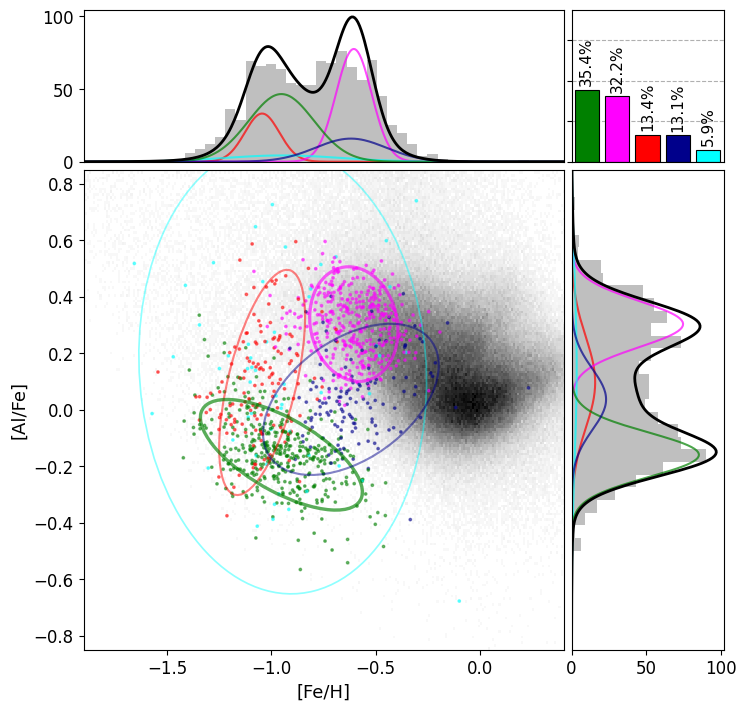

In [ ]:
galah_pipeline.plot_XD(x_key = 'fe_h', y_key='Al_fe', 
    z_score = 2,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["red", "magenta", "cyan", "green", "darkblue"], 
    xlim = (-1.9, 0.4), ylim=(-0.85, 0.85),
)

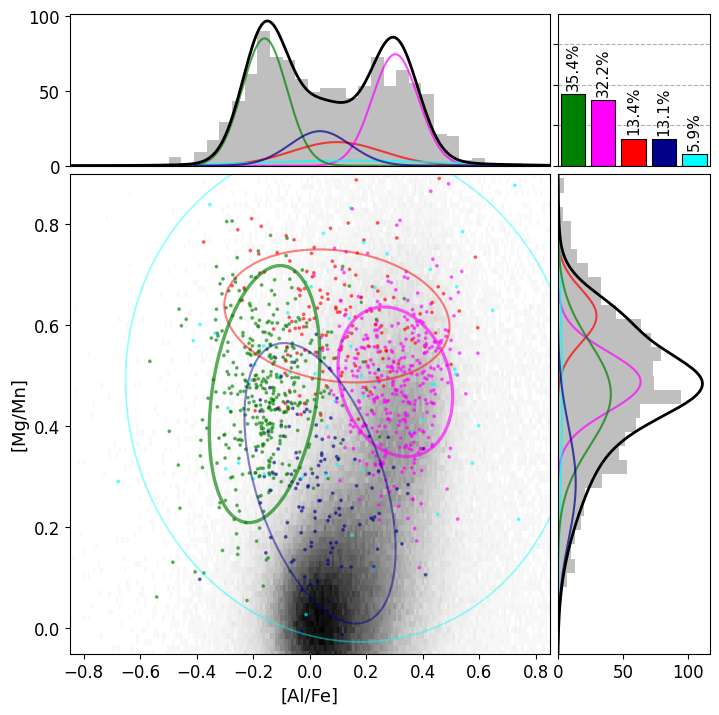

In [ ]:
galah_pipeline.plot_XD( x_key = 'Al_fe', y_key='Mg_Mn',
    z_score = 2,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["red", "magenta", "cyan", "green", "darkblue"], 
    xlim =(-0.85, 0.85), ylim=(-0.05, 0.9),
)

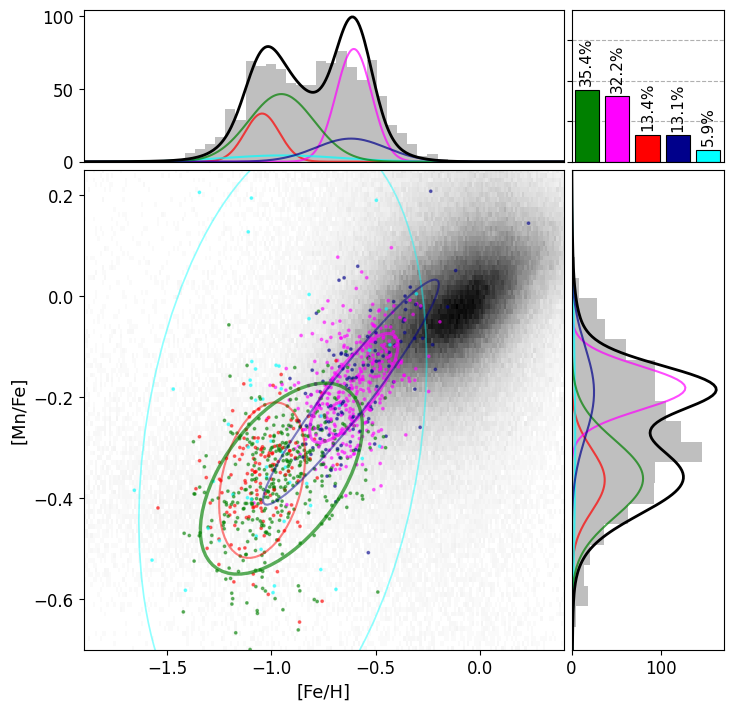

In [ ]:
galah_pipeline.plot_XD( x_key = 'fe_h', y_key='Mn_fe',
    z_score = 2,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["red", "magenta", "cyan", "green", "darkblue"], 
    xlim =(-1.9, 0.4), ylim=(-0.7, 0.25),
)

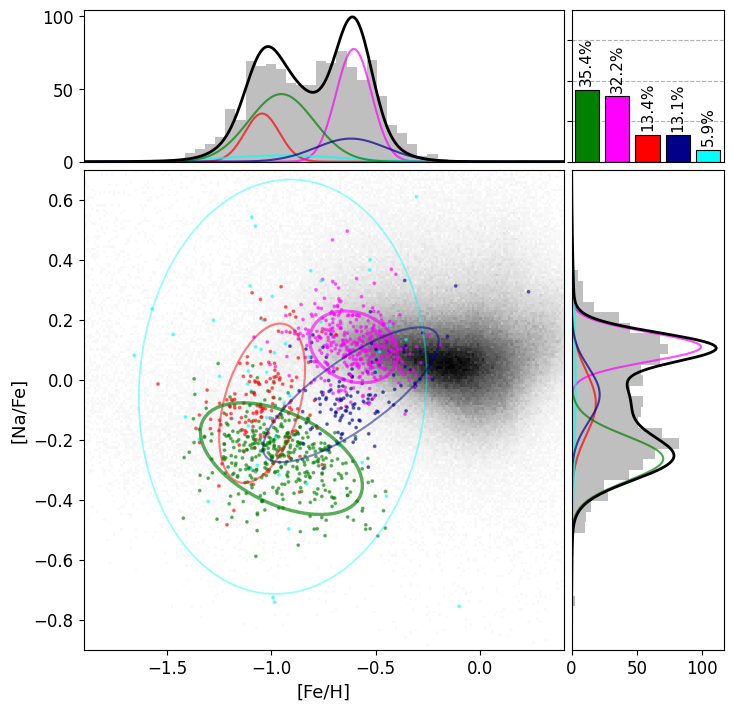

In [ ]:
galah_pipeline.plot_XD( x_key = 'fe_h', y_key='Na_fe',
    z_score = 2,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["red", "magenta", "cyan", "green", "darkblue"], 
    xlim =(-1.9, 0.4), ylim=(-0.9, 0.7),
)

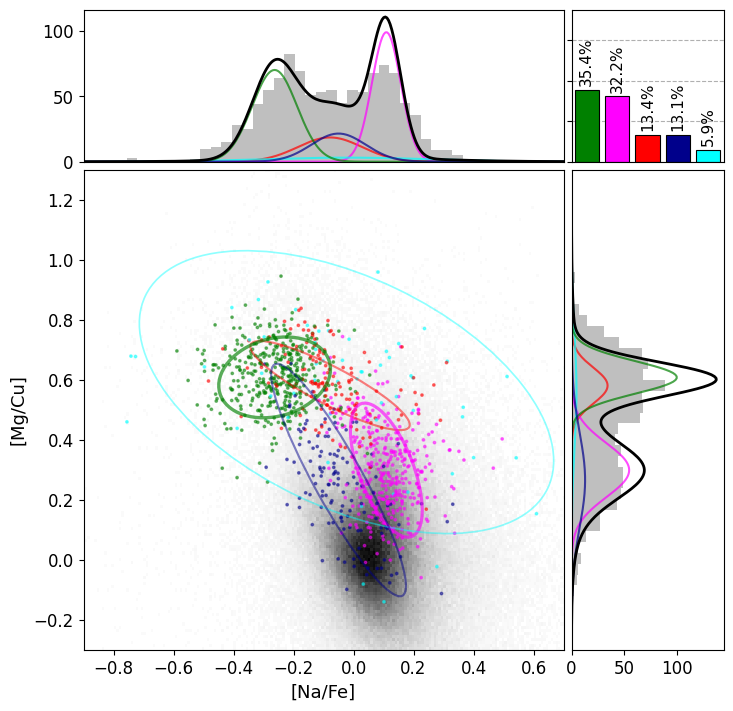

In [ ]:
galah_pipeline.plot_XD( x_key = 'Na_fe', y_key='Mg_Cu',
    z_score = 2,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["red", "magenta", "cyan", "green", "darkblue"], 
    xlim =(-0.9, 0.7), ylim=(-0.3, 1.3),
)

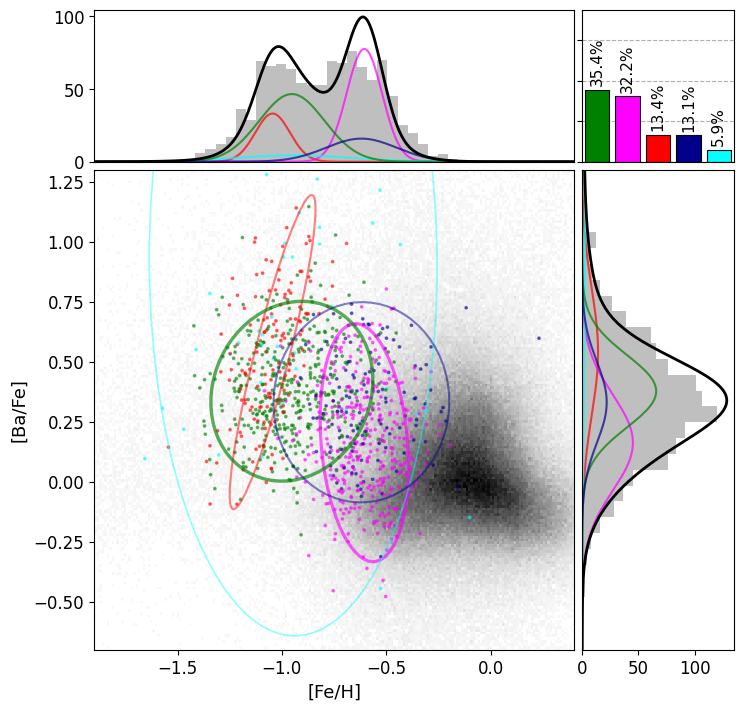

In [ ]:
galah_pipeline.plot_XD( x_key = 'fe_h', y_key='Ba_fe',
    z_score = 2,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["red", "magenta", "cyan", "green", "darkblue"], 
    xlim =(-1.9, 0.4), ylim=(-0.7, 1.3),
)

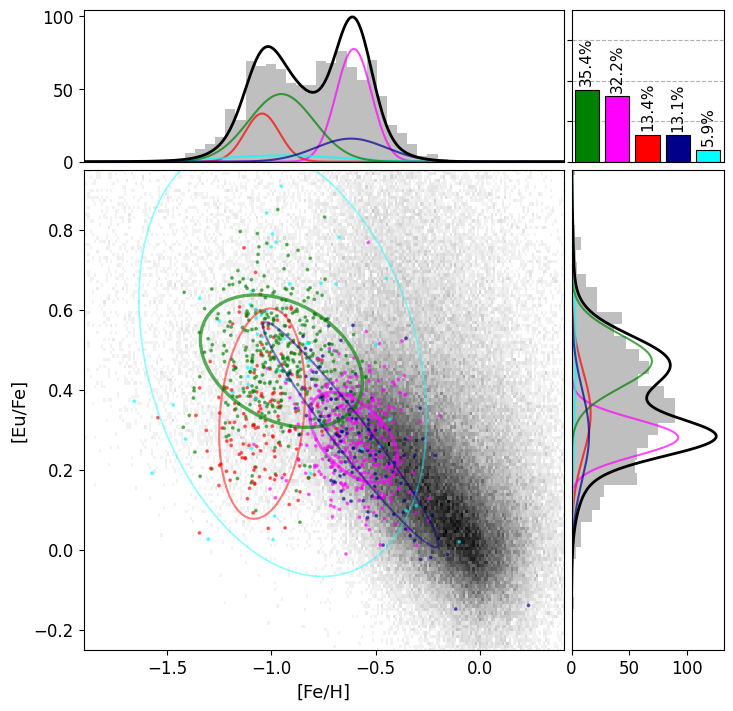

In [ ]:
galah_pipeline.plot_XD( x_key = 'fe_h', y_key='Eu_fe',
    z_score = 2,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["red", "magenta", "cyan", "green", "darkblue"], 
    xlim =(-1.9, 0.4), ylim=(-0.25, 0.95),
)

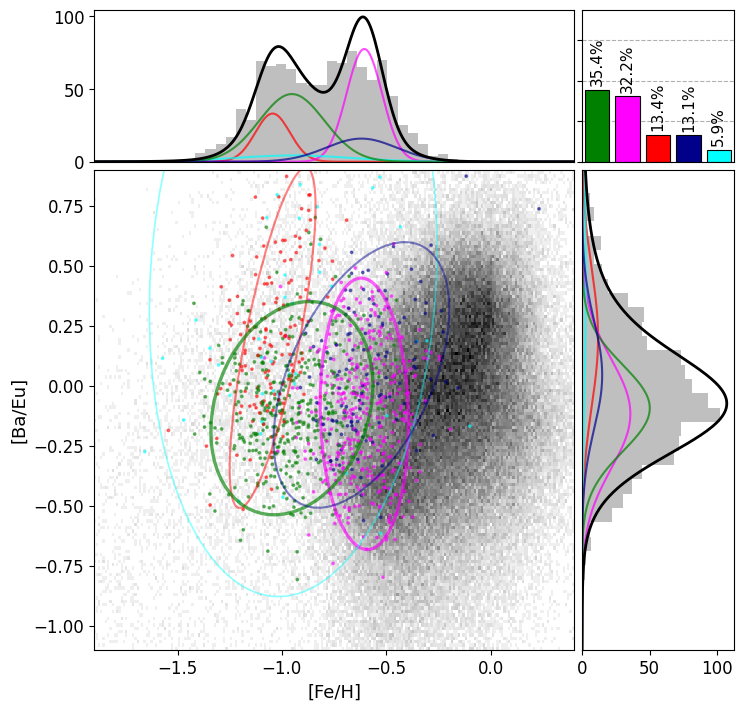

In [ ]:
galah_pipeline.plot_XD( x_key = 'fe_h', y_key='Ba_Eu',
    z_score = 2,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["red", "magenta", "cyan", "green", "darkblue"], 
    xlim =(-1.9, 0.4), ylim=(-1.1, 0.9),
)

## Figure 5 Plots

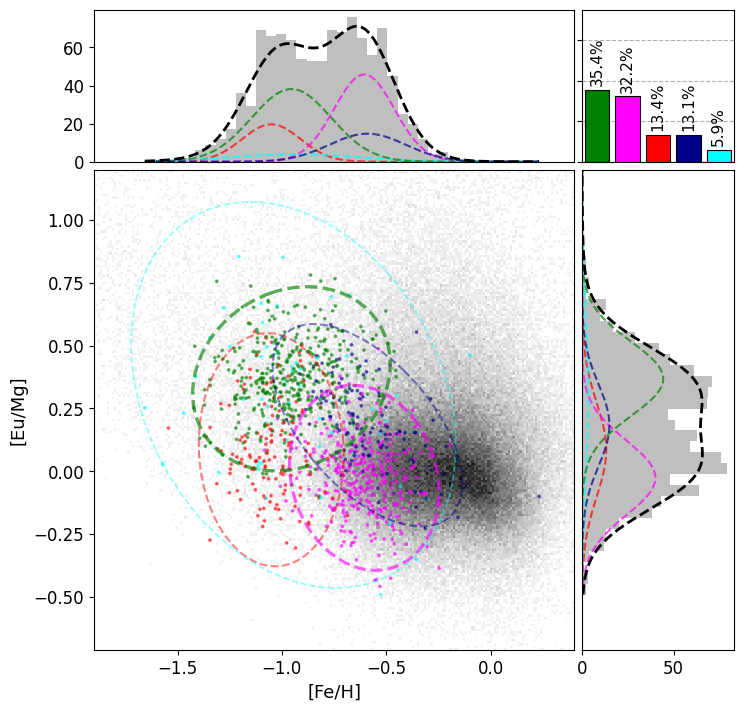

In [ ]:
galah_pipeline.plot_nonXD(x_key = 'fe_h', y_key='Eu_Mg',
    z_score = 2,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["red", "magenta", "cyan", "green", "darkblue"], 
    xlim =(-1.9, 0.4), ylim=(-0.71, 1.2),
)

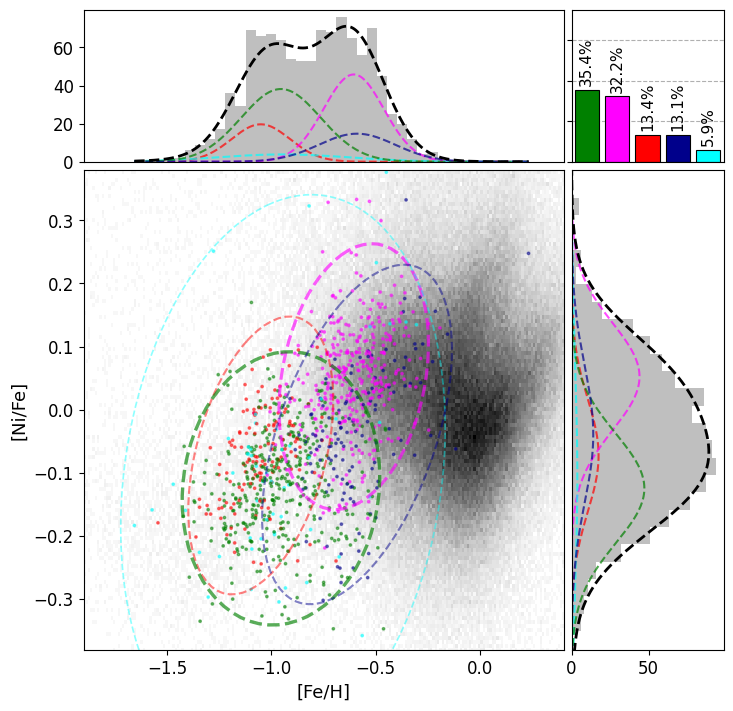

In [ ]:
galah_pipeline.plot_nonXD(x_key = 'fe_h', y_key='Ni_fe',
    z_score = 2,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["red", "magenta", "cyan", "green", "darkblue"], 
    xlim =(-1.9, 0.4), ylim=(-0.38, 0.38),
)

## What if we try and investigate its more components:
### **6 Components**
- Simply gain an additional background components

In [ ]:
galah_pipeline.compare_XD(opt_metric = 'BIC', n_gauss_filter = 6, repeat_no_filter = None, save_path='XD_Results/Galah/gallah_XD_2_3_23.pkl', display_full = False)
galah_pipeline.assigment_XD(assignment_metric = 'best filtered')


 The following filters were applied: {'n_gauss': 6, 'repeat': None}
 Best BIC Score from filtered inputs: 29321.5636 occurred at:
   - Gaussian Components (n_gauss): 6
   - Repeat cycle (n): 2
   - Initialisation (i): 33
Assigning stars to Gaussian components based on the best filtered XD model.
This has been optimised for the BIC score and returned the results:
 Best BIC Score: 29321.5636 occurred at:
   - Gaussian Components (n_gauss): 6
   - Repeat cycle (n): 2
   - Initialisation (i): 33


In [ ]:
labels = {
    2: "GS/E",
    4: "Splash",
    3: "Aurora",
    1: "Eos",
    5: "Back 1",
    0: "Back 2",
}

galah_gauss_summary = galah_pipeline.table_results_XD(labels)


Summary of GMM Fit Result for GALAH-Gaia Sample
+----+-------------+--------------+---------+-------------+--------------+-------------+--------------+--------------+--------------+-------------+-------------+-------------+-------------+-------------+--------------+---------------------------------+
|    | Component   |   Weight (%) |   Count |   Count (%) | fe_h         | alpha_fe    | Na_fe        | Al_fe        | Mn_fe        | Y_fe        | Ba_fe       | Eu_fe       | Mg_Cu       | Mg_Mn       | Ba_Eu        | Scaled Energy ($\times 10^5$)   |
+====+=============+==============+=========+=============+==============+=============+==============+==============+==============+=============+=============+=============+=============+=============+==============+=================================+
|  0 | GS/E        |         35.4 |     391 |        36.9 | -0.95 ± 0.16 | 0.11 ± 0.05 | -0.26 ± 0.07 | -0.16 ± 0.08 | -0.36 ± 0.08 | 0.07 ± 0.05 | 0.38 ± 0.15 | 0.47 ± 0.06 | 0.61 ± 0.05 | 0.

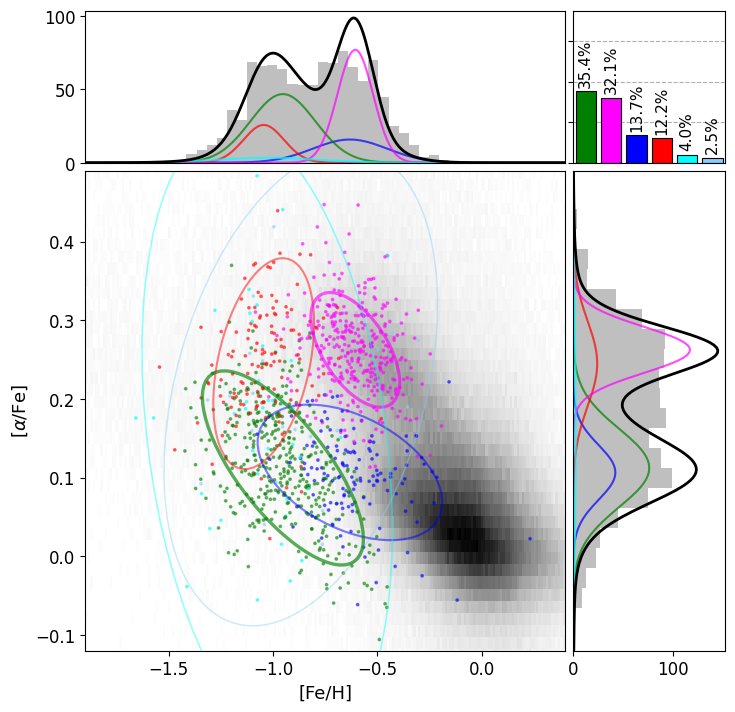

In [ ]:
galah_pipeline.plot_XD( x_key = 'fe_h', y_key='alpha_fe', 
    z_score = 2,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["lightskyblue", "blue", "green", "red", "magenta", "cyan"], 
    xlim = (-1.9, 0.4), ylim=(-0.12, 0.49),
)

## What if we try and investigate its more components:
### **7 Components**
- Simply gain an additional background component - ie now 3 background components
- Unlike APOGEE we have not been able to identify the splitting of GS/E into alpha plateau and knee 
- This is likely a result of the lack of data below [Fe/H] < -1.5 with literature suggesting the bend at [Fe/H] $\approx$ -1.3

In [ ]:
galah_pipeline.compare_XD(opt_metric = 'BIC', n_gauss_filter = 7, repeat_no_filter = None, save_path='XD_Results/Galah/gallah_XD_2_3_23.pkl', display_full = False)
galah_pipeline.assigment_XD(assignment_metric = 'best filtered')

 The following filters were applied: {'n_gauss': 7, 'repeat': None}
 Best BIC Score from filtered inputs: 29896.6475 occurred at:
   - Gaussian Components (n_gauss): 7
   - Repeat cycle (n): 1
   - Initialisation (i): 20
Assigning stars to Gaussian components based on the best filtered XD model.
This has been optimised for the BIC score and returned the results:
 Best BIC Score: 29896.6475 occurred at:
   - Gaussian Components (n_gauss): 7
   - Repeat cycle (n): 1
   - Initialisation (i): 20


In [ ]:
labels = {
    2: "GS/E",
    4: "Splash",
    6: "Aurora",
    0: "Eos",
    1: "Back 1",
    3: "Back 2",
    5: "Back 3",
}

galah_gauss_summary = galah_pipeline.table_results_XD(labels)


Summary of GMM Fit Result for GALAH-Gaia Sample
+----+-------------+--------------+---------+-------------+--------------+-------------+--------------+--------------+--------------+-------------+-------------+-------------+-------------+-------------+--------------+---------------------------------+
|    | Component   |   Weight (%) |   Count |   Count (%) | fe_h         | alpha_fe    | Na_fe        | Al_fe        | Mn_fe        | Y_fe        | Ba_fe       | Eu_fe       | Mg_Cu       | Mg_Mn       | Ba_Eu        | Scaled Energy ($\times 10^5$)   |
+====+=============+==============+=========+=============+==============+=============+==============+==============+==============+=============+=============+=============+=============+=============+==============+=================================+
|  0 | GS/E        |         31   |     338 |        31.9 | -1.01 ± 0.11 | 0.13 ± 0.04 | -0.25 ± 0.07 | -0.14 ± 0.07 | -0.37 ± 0.08 | 0.08 ± 0.06 | 0.37 ± 0.15 | 0.48 ± 0.08 | 0.62 ± 0.04 | 0.

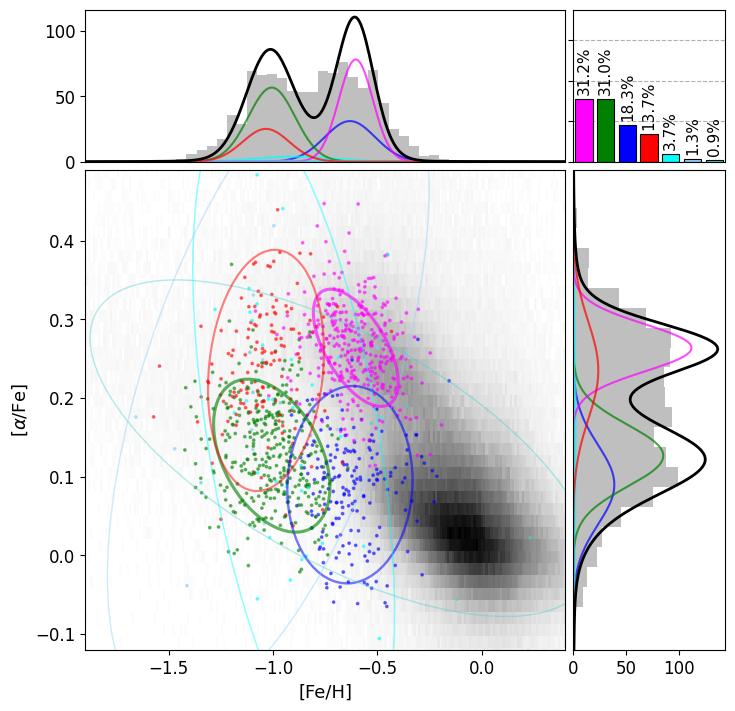

In [ ]:
galah_pipeline.plot_XD( x_key = 'fe_h', y_key='alpha_fe', 
    z_score = 2,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["blue", "cyan", "green", "lightskyblue", "magenta", "mediumturquoise", "red"],
    xlim = (-1.9, 0.4), ylim=(-0.12, 0.49),
)